We start training different models and evaluate results

## Loading Data

In [377]:
# Import libraries needed
import pandas as pd


In [313]:
PATH_INPUT_CSV = './data_train_merged_23_10.csv'


In [884]:
# We read Excel with Historic data of landslides and other events
training = pd.read_csv(PATH_INPUT_CSV,index_col=0)


In [899]:
X_train_final['landslide']

8767    1
3381    0
2994    0
4576    0
5879    1
       ..
7891    1
9225    1
4859    0
3264    0
2732    0
Name: landslide, Length: 6819, dtype: int64

In [317]:
# training =training.dropna()
# len(training)

## Preprocessing


We process features and generate training data and test data

In [318]:
# Import skleran preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [880]:
df = training

In [883]:
df.groupby(['landslide']).count()


,landslide_id,precipitation_mm_last_7_days,satellite,elevation_1,elevation_6,elevation_11,elevation_16,elevation_21,elevation_2,elevation_7,...,soil_rec_symbol,soil_rec_mat_origin,soil_rec_sew_class,soil_rec_tex_sup,soil_rec_c_tex_sup,soil_rec_tex_sub,soil_rec_c__tex_sub,soil_rec_risk_eros,soil_tax,soil_use
landslide,,,,,,,,,,,,,,,,,,,,,
0,5764,5764,5764,5764,5764,5764,5764,5764,5764,5764,...,5764,5764,5764,5764,5764,5764,5764,5764,5764,5764
1,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978,...,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978


In [323]:
# We use a label encoder for each of the columns of categories
features_string = [ 
 'soil_tax',
 'satellite',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
 'fis_nomr',
 'soil_use',
 'rock_geo',
 'rock_type',
 'rock_period']
for feature in features_string:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

In [582]:
X_train['soil_tax'].unique()

array([4, 7, 5, 2, 3, 1, 6, 0, 8])

In [786]:
features = [
# #     'elevation_1',
# #  'elevation_6',
# #  'elevation_11',
# #  'elevation_16',
# #  'elevation_21',
# #  'elevation_2',
# #  'elevation_7',
# #  'elevation_12',
# #  'elevation_17',
# #  'elevation_22',
#  'elevation_3',
#  'elevation_8',
 'elevation_13',
#  'elevation_18',
#  'elevation_23',
# #  'elevation_4',
# #  'elevation_9',
# #  'elevation_14',
# #  'elevation_19',
# #  'elevation_24',
# #  'elevation_5',
# #  'elevation_10',
# #  'elevation_15',
# #  'elevation_20',
# #  'elevation_25',
# #  'slope_1',
# #  'slope_6',
# #  'slope_11',
# #  'slope_16',
# #  'slope_21',
# #  'slope_2',
# #  'slope_7',
# #  'slope_12',
# #  'slope_17',
# #  'slope_22',
#  'slope_3',
#  'slope_8',
 'slope_13',
#  'slope_18',
#  'slope_23',
# #  'slope_4',
# #  'slope_9',
# #  'slope_14',
# #  'slope_19',
# #  'slope_24',
# #  'slope_5',
# #  'slope_10',
# #  'slope_15',
# #  'slope_20',
# #  'slope_25',
# #  'aspect_1',
# #  'aspect_6',
# #  'aspect_11',
# #  'aspect_16',
# #  'aspect_21',
# #  'aspect_2',
# #  'aspect_7',
# #  'aspect_12',
# #  'aspect_17',
# #  'aspect_22',
#  'aspect_3',
#  'aspect_8',
 'aspect_13',
#  'aspect_18',
#  'aspect_23',
# #  'aspect_4',
# #  'aspect_9',
# #  'aspect_14',
# #  'aspect_19',
# #  'aspect_24',
# #  'aspect_5',
# #  'aspect_10',
# #  'aspect_15',
# #  'aspect_20',
# #  'aspect_25',
# #  'placurv_1',
# #  'placurv_6',
# #  'placurv_11',
# #  'placurv_16',
# #  'placurv_21',
# #  'placurv_2',
# #  'placurv_7',
# #  'placurv_12',
# #  'placurv_17',
# #  'placurv_22',
#  'placurv_3',
#  'placurv_8',
 'placurv_13',
#  'placurv_18',
#  'placurv_23',
# #  'placurv_4',
# #  'placurv_9',
# #  'placurv_14',
# #  'placurv_19',
# #  'placurv_24',
# #  'placurv_5',
# #  'placurv_10',
# #  'placurv_15',
# #  'placurv_20',
# #  'placurv_25',
# #  'procurv_1',
# #  'procurv_6',
# #  'procurv_11',
# #  'procurv_16',
# #  'procurv_21',
# #  'procurv_2',
# #  'procurv_7',
# #  'procurv_12',
# #  'procurv_17',
# #  'procurv_22',
#  'procurv_3',
#  'procurv_8',
 'procurv_13',
#  'procurv_18',
#  'procurv_23',
# #  'procurv_4',
# #  'procurv_9',
# #  'procurv_14',
# #  'procurv_19',
# #  'procurv_24',
# #  'procurv_5',
# #  'procurv_10',
# #  'procurv_15',
# #  'procurv_20',
# #  'procurv_25',
# #  'latitude',
# #  'longitude',
# # 'event_date',
# #  'departamento',
# #  'municipio',
# #  'incident',
# #  'image_name'
 'precipitation_mm_last_7_days',
#  'satellite',
 'soil_tax',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
#  'fis_nomr',
 'soil_use',
#  'rock_geo',
 'rock_type',
 'rock_period',
]


In [325]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['landslide'], test_size=0.3,random_state=0)


In [326]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [327]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 4059, 1: 2760})
Testing target statistics: Counter({0: 1705, 1: 1218})


In [328]:
over_sampler = RandomOverSampler(random_state=0)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 4059, 0: 4059})
Testing target statistics: Counter({0: 1705, 1: 1218})


In [329]:
len(training)

9742

In [338]:
# len(training[(training.elevation_13>800) & (training.landslide==1)]) / len(training[training.landslide==1]) 
len(training[(training.elevation_13>800) & (training.landslide==0)]) / len(training[training.landslide==0]) 
len(training[training.landslide==0]) 
len(training[(training.elevation_13>800) & (training.landslide==0)]) 

1515

## Start Training different models

### Create Training Models

In [820]:
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,precision_recall_fscore_support
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve,precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve


In [445]:
def train_with_model_train_test_method(clf, model, X_train, y_train, X_test,y_test, using_oversample=False):
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    prediction_prob = clf.predict_proba(X_test)
    prediction_train_y = clf.predict(X_train)
    prediction_prob_y_train = clf.predict_proba(X_train)
    accuracy_score_model = accuracy_score(y_test, prediction)
    accuracy_score_train = accuracy_score(y_train, prediction_train_y)
    roc_auc_score_model = roc_auc_score(y_test,prediction_prob[:,1], labels=[1,0])
    roc_auc_score_train = roc_auc_score(y_train,prediction_prob_y_train[:,1], labels=[1,0])
    print("Model {} {}".format(model, 'using oversample' if using_oversample else ''))
    print("Scores")
    print("Accuracy score Test: {}".format( str(accuracy_score_model)))
    print("RocAuc score Test: {}".format( str(roc_auc_score_model)))
    print("Accuracy score Train: {}".format( str(accuracy_score_train)))
    print("RocAuc score Train: {}".format( str(roc_auc_score_train)))
    print("Confusion Matrix")
    confusion_matrix_model = confusion_matrix(y_test, prediction, labels=[1,0])
    print((confusion_matrix_model))
    target_names = ['non_landslide','landslide']
    print("Classification Report")
    class_report = classification_report(y_test, prediction, target_names=target_names)
    print(class_report)
    print(" Roc Curve")
    fpr, tpr, _ = roc_curve(y_test,  prediction_prob[::,1], pos_label=1)
    fpr_t, tpr_t, _ = roc_curve(y_train,  prediction_prob_y_train[::,1],pos_label=1)
    plt.plot(fpr_t,tpr_t,color='g',label='train')
    plt.plot(fpr,tpr,color='r',label='test')
    # plt.legend(loc="upper left")
    # plt.ylabel('True Positive Rate')
    # plt.xlabel('False Positive Rate')
    # plt.show()
    target_names = ['landslide','non_landslide',]
    plot_confusion_matrix(clf,X_test,y_test,labels=[1,0],colorbar=True,display_labels=target_names)
    plt.show()
    plot_roc_curve(clf,X_test,y_test,pos_label=1)
    plt.show()
    plot_precision_recall_curve(clf,X_test,y_test,pos_label=1)
    plt.show()
    try:
        print("Feature Importance")
        importances = clf.feature_importances_
        feature_importances_dict = dict()
        for x in range(len(importances)):
            feature_importances_dict[features[x]] = round(importances[x]*100,2)
        feature_importances_dict_sorted = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1],reverse=True)}
        print("\tPlace\tFeature\t%")
        index = 1
        for key in feature_importances_dict_sorted.keys():
            # if(feature_importances_dict[key]>0.5):
            print("\t {}\t& {}\t& {} \\\\ \\hline".format(index,key.replace("_","\\_"),feature_importances_dict[key]))
            index +=1
        importances = [feature_importances_dict_sorted[x] for x in reversed(feature_importances_dict_sorted.keys())]
        featuress = reversed(feature_importances_dict_sorted.keys())
        plt.figure(1)
        plt.barh(range(len(feature_importances_dict)), importances, color='g', align='center')
        plt.yticks(range(len(feature_importances_dict)), featuress)
        plt.xlabel('Importancia %')
    except:
        pass
    return accuracy_score_model,roc_auc_score_model, class_report, feature_importances_dict_sorted


In [821]:
def train_with_model_train_test_method_no_print(clf, model, X_test,y_test):
    prediction = clf.predict(X_test)
    prediction_prob = clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, prediction)
    roc_auc_score_model = roc_auc_score(y_test,prediction_prob[:,1], labels=[1,0])
    res = precision_recall_fscore_support(y_train,  prediction_prob_y_train[::,1],pos_label=1)
    precision = rec[0]
    recall = rec[1]
    f1score = f1_score(y_train,  prediction_prob_y_train[::,1],pos_label=1)
    return accuracy,roc_auc_score_model, precision, recall,f1score

In [405]:
def train_with_model_cross_validation_method(clf,model,training_df,features,using_oversample=False):
    print("Model {} {}".format(model, 'using oversample' if using_oversample else ''))
    print("Cross Validation")
    k_folds = KFold(n_splits=5, shuffle=True,random_state=0)
    kfold = 1
    X = training_df.loc[:, features]
    y = training_df.loc[:,'landslide']
    # for train_index, test_index in kf5.split(training_df):
    #     X_train = training_df.iloc[train_index].loc[:, features]
    #     X_test = training_df.iloc[test_index][features]
    #     y_train = training_df.iloc[train_index].loc[:,'landslide']
    #     if(using_oversample):
    #         over_sampler = RandomOverSampler(random_state=0)
    #         X_train, y_train = over_sampler.fit_resample(X_train, y_train)
    #     y_test = training_df.loc[test_index]['landslide']
    scores = cross_validate(clf, X, y, cv = k_folds,scoring=['roc_auc','precision_macro', 'recall_macro'],return_estimator=True)
    for idx,estimator in enumerate(scores['estimator']):
        print("Features sorted by their score for estimator {}:".format(idx))
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                        index = features,
                                            columns=['importance']).sort_values('importance', ascending=False)
        print(feature_importances)
    print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

### Train With DecistionTreeClassifier

In [968]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0,)
model = "DecisionTree"


#### Train Test First Approach

Model DecisionTreeClassifier(random_state=0) 
Scores
Accuracy score Test: 0.8197057817310982
RocAuc score Test: 0.8144995160568019
Accuracy score Train: 1.0
RocAuc score Train: 1.0
Confusion Matrix
[[ 954  264]
 [ 263 1442]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.85      0.85      0.85      1705
    landslide       0.78      0.78      0.78      1218

     accuracy                           0.82      2923
    macro avg       0.81      0.81      0.81      2923
 weighted avg       0.82      0.82      0.82      2923

 Roc Curve


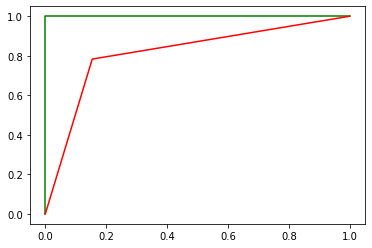

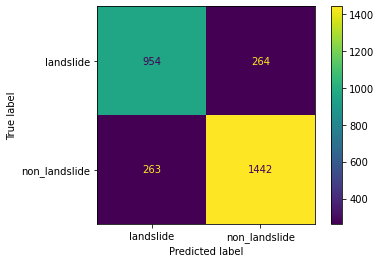

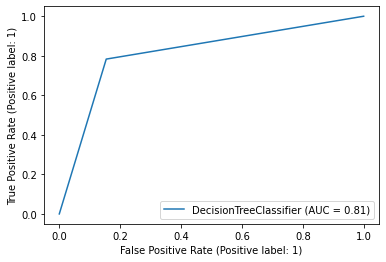

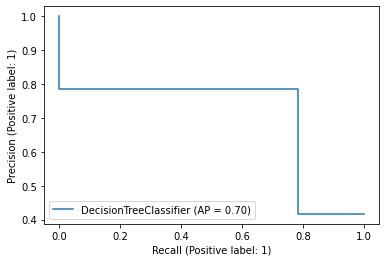

Feature Importance


UnboundLocalError: local variable 'feature_importances_dict_sorted' referenced before assignment

In [970]:
c = train_with_model_train_test_method(clf=clf_dt,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


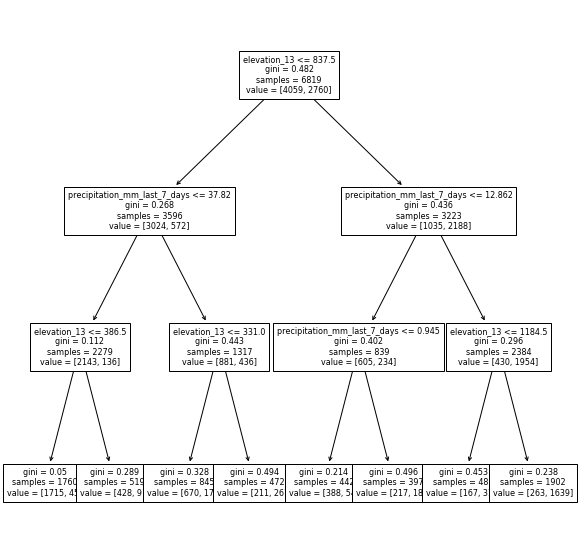

In [452]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_dt, fontsize=8, feature_names=features,max_depth=3)
plt.show()


#### Tune Parameters

In [355]:
clf_dt = DecisionTreeClassifier(random_state=0)
model = "DecisionTree"

In [365]:
from sklearn.model_selection import RandomizedSearchCV
params = {
# "n_components" = list(range(1,X_train.shape[1]+1,1)),

"criterion" : ['gini', 'entropy'],
 "max_depth": [ 3, 4, 5, 6, 8, 10, 12],

#  "n_estimators":[50,100,200,300,400],

}
rs_model=RandomizedSearchCV(clf_dt,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [366]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12]},
                   scoring='roc_auc', verbose=3)

In [367]:
rs_model.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [369]:
clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


In [370]:
score=cross_val_score(clf_dt,X_train,y_train,cv=10)

In [371]:
print(score)
score.mean()

[0.83431085 0.80938416 0.83431085 0.81231672 0.84457478 0.83870968
 0.81671554 0.85337243 0.82404692 0.81057269]


0.827831462270854

Model DecisionTree 
Scores
Accuracy score Test: 0.8351009237085186
RocAuc score Test: 0.911236631370113
Accuracy score Train: 0.8540280857354028
RocAuc score Train: 0.9236232920908347
Confusion Matrix
[[1062  156]
 [ 326 1379]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.90      0.81      0.85      1705
    landslide       0.77      0.87      0.82      1218

     accuracy                           0.84      2923
    macro avg       0.83      0.84      0.83      2923
 weighted avg       0.84      0.84      0.84      2923

 Roc Curve


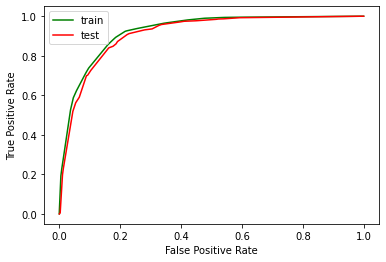

Feature Importance
	Place	Feature	%
	1	elevation_13	51.74
	2	precipitation_mm_last_7_days	34.51
	3	soil_rec_tex_sup	2.69
	4	soil_rec_symbol	2.67
	5	rock_type	1.99
	6	rock_period	1.62
	7	soil_tax	1.3
	8	soil_rec_tex_sub	1.14
	9	soil_rec_c__tex_sub	1.13
	10	soil_use	0.52
	11	soil_rec_mat_origin	0.51


(0.8351009237085186, 0.911236631370113)

In [372]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf_dt,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=False)

### Train With RandomForestClassifier

In [458]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier( random_state=0)
model = "RandomForest"


##### Train First Approach

####

In [468]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'bootstrap': [True, False],
 'max_depth': [2,3,4,6,6,7,8,9,10,20,30],
 "criterion" : ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200,300, 400, 600, 800]
}
rs_model=RandomizedSearchCV(clf_rf,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [470]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 6, 6, 7, 8, 9,
                                                      10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         600, 800]},
                   scoring='roc_auc', verbose=3)

In [472]:
rs_model.best_score_

0.9464014824651266

In [473]:
rs_model.best_estimator_


RandomForestClassifier(max_depth=20, max_features='sqrt', random_state=0)

Model RandomForest 
Scores
Accuracy score Test: 0.8850496065685939
RocAuc score Test: 0.9494462341514621
Accuracy score Train: 0.9997067018624431
RocAuc score Train: 0.9999999107369203
Confusion Matrix
[[1048  170]
 [ 166 1539]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.90      0.90      0.90      1705
    landslide       0.86      0.86      0.86      1218

     accuracy                           0.89      2923
    macro avg       0.88      0.88      0.88      2923
 weighted avg       0.88      0.89      0.89      2923

 Roc Curve


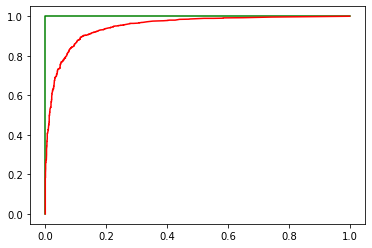

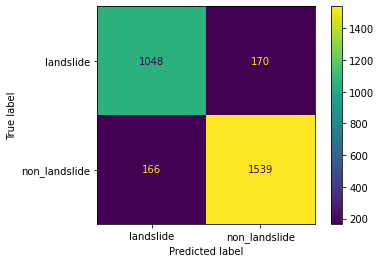

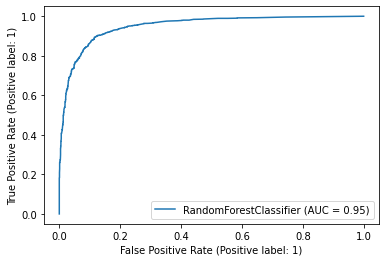

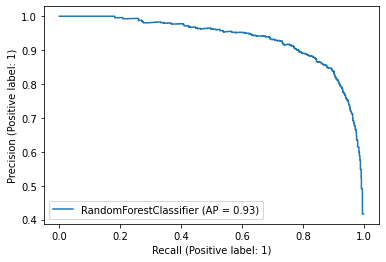

Feature Importance
	Place	Feature	%
	 1	& elevation\_13	& 22.37 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 22.26 \\ \hline
	 3	& soil\_rec\_tex\_sub	& 7.07 \\ \hline
	 4	& rock\_period	& 5.18 \\ \hline
	 5	& rock\_type	& 4.69 \\ \hline
	 6	& slope\_13	& 4.27 \\ \hline
	 7	& soil\_rec\_tex\_sup	& 4.14 \\ \hline
	 8	& procurv\_13	& 4.02 \\ \hline
	 9	& aspect\_13	& 3.67 \\ \hline
	 10	& soil\_tax	& 3.66 \\ \hline
	 11	& soil\_use	& 3.58 \\ \hline
	 12	& soil\_rec\_symbol	& 3.51 \\ \hline
	 13	& soil\_rec\_mat\_origin	& 3.42 \\ \hline
	 14	& placurv\_13	& 2.42 \\ \hline
	 15	& soil\_rec\_c\_\_tex\_sub	& 2.24 \\ \hline
	 16	& soil\_rec\_risk\_eros	& 1.67 \\ \hline
	 17	& soil\_rec\_c\_tex\_sup	& 1.13 \\ \hline
	 18	& soil\_rec\_sew\_class	& 0.71 \\ \hline


(0.8850496065685939,
 0.9494462341514621,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.90      0.90      0.90      1705\n    landslide       0.86      0.86      0.86      1218\n\n     accuracy                           0.89      2923\n    macro avg       0.88      0.88      0.88      2923\n weighted avg       0.88      0.89      0.89      2923\n',
 {'elevation_13': 22.37,
  'precipitation_mm_last_7_days': 22.26,
  'soil_rec_tex_sub': 7.07,
  'rock_period': 5.18,
  'rock_type': 4.69,
  'slope_13': 4.27,
  'soil_rec_tex_sup': 4.14,
  'procurv_13': 4.02,
  'aspect_13': 3.67,
  'soil_tax': 3.66,
  'soil_use': 3.58,
  'soil_rec_symbol': 3.51,
  'soil_rec_mat_origin': 3.42,
  'placurv_13': 2.42,
  'soil_rec_c__tex_sub': 2.24,
  'soil_rec_risk_eros': 1.67,
  'soil_rec_c_tex_sup': 1.13,
  'soil_rec_sew_class': 0.71})

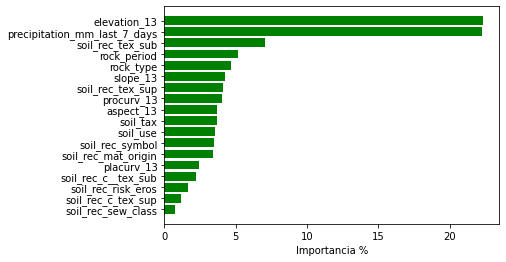

In [474]:
# Train Not Using oversample
clf_rf= RandomForestClassifier(max_depth=20, max_features='sqrt', random_state=0)
train_with_model_train_test_method(clf=clf_rf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


### Train With AdaBoostClassifer

In [504]:
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier( random_state=0)
model = "AdaBoost"


In [ ]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_adaboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


#### Tune Parameters

In [505]:
clf_adaboost =AdaBoostClassifier( random_state=0)
model = "Adaboost"

In [506]:
from sklearn.model_selection import RandomizedSearchCV
params = {
 "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30,0.5,1],


 "n_estimators":[50,100,200,300,400,500],
 
}
rs_model=RandomizedSearchCV(clf_adaboost,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [507]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 1],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [508]:
rs_model.best_estimator_


AdaBoostClassifier(learning_rate=0.25, n_estimators=500, random_state=0)

In [509]:
clf_adaboost =AdaBoostClassifier(learning_rate=0.25, n_estimators=500, random_state=0)

Model SVM 
Scores
Accuracy score Test: 0.8641806363325351
RocAuc score Test: 0.9364996701481685
Accuracy score Train: 0.8659627511365303
RocAuc score Train: 0.9419404365321651
Confusion Matrix
[[1032  186]
 [ 211 1494]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.89      0.88      0.88      1705
    landslide       0.83      0.85      0.84      1218

     accuracy                           0.86      2923
    macro avg       0.86      0.86      0.86      2923
 weighted avg       0.86      0.86      0.86      2923

 Roc Curve


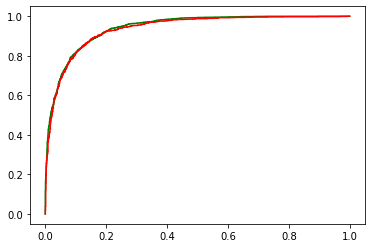

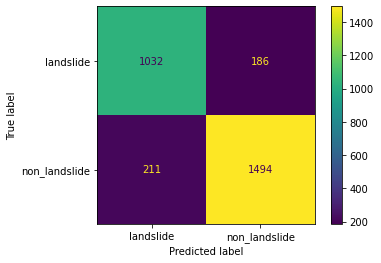

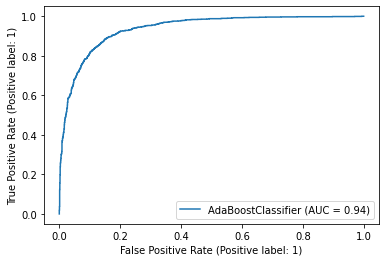

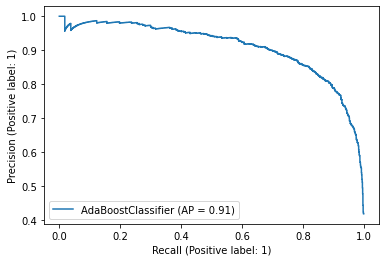

Feature Importance
	Place	Feature	%
	 1	& rock\_period	& 18.2 \\ \hline
	 2	& soil\_rec\_symbol	& 16.2 \\ \hline
	 3	& elevation\_13	& 15.2 \\ \hline
	 4	& soil\_rec\_mat\_origin	& 11.2 \\ \hline
	 5	& precipitation\_mm\_last\_7\_days	& 7.6 \\ \hline
	 6	& soil\_rec\_tex\_sub	& 7.2 \\ \hline
	 7	& placurv\_13	& 4.6 \\ \hline
	 8	& slope\_13	& 4.2 \\ \hline
	 9	& soil\_use	& 3.4 \\ \hline
	 10	& soil\_tax	& 2.8 \\ \hline
	 11	& procurv\_13	& 2.6 \\ \hline
	 12	& soil\_rec\_sew\_class	& 1.6 \\ \hline
	 13	& soil\_rec\_tex\_sup	& 1.6 \\ \hline
	 14	& aspect\_13	& 1.2 \\ \hline
	 15	& soil\_rec\_c\_\_tex\_sub	& 0.8 \\ \hline
	 16	& rock\_type	& 0.8 \\ \hline
	 17	& soil\_rec\_c\_tex\_sup	& 0.6 \\ \hline
	 18	& soil\_rec\_risk\_eros	& 0.2 \\ \hline


(0.8641806363325351,
 0.9364996701481685,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.89      0.88      0.88      1705\n    landslide       0.83      0.85      0.84      1218\n\n     accuracy                           0.86      2923\n    macro avg       0.86      0.86      0.86      2923\n weighted avg       0.86      0.86      0.86      2923\n',
 {'rock_period': 18.2,
  'soil_rec_symbol': 16.2,
  'elevation_13': 15.2,
  'soil_rec_mat_origin': 11.2,
  'precipitation_mm_last_7_days': 7.6,
  'soil_rec_tex_sub': 7.2,
  'placurv_13': 4.6,
  'slope_13': 4.2,
  'soil_use': 3.4,
  'soil_tax': 2.8,
  'procurv_13': 2.6,
  'soil_rec_sew_class': 1.6,
  'soil_rec_tex_sup': 1.6,
  'aspect_13': 1.2,
  'soil_rec_c__tex_sub': 0.8,
  'rock_type': 0.8,
  'soil_rec_c_tex_sup': 0.6,
  'soil_rec_risk_eros': 0.2})

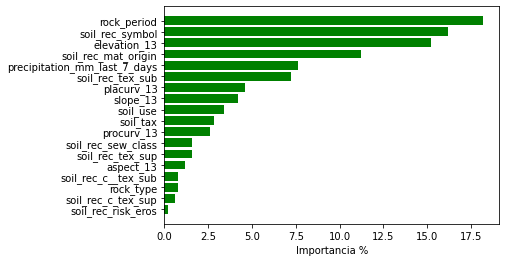

In [537]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf_adaboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,using_oversample=False)

### Train With XGBoostClassifer

In [475]:
import warnings
warnings.filterwarnings("ignore")

In [477]:
import xgboost as xgb
clf_xgboost = xgb.XGBClassifier(random_state=0,)
model = "XGBoost"


#### Train Test Method Not Using Oversample

[23:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBoost 
Scores
Accuracy score Test: 0.8802600068422853
RocAuc score Test: 0.9468620737808724
Accuracy score Train: 0.9894412670479542
RocAuc score Train: 0.9994647785740045
Confusion Matrix
[[1043  175]
 [ 175 1530]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.90      0.90      0.90      1705
    landslide       0.86      0.86      0.86      1218

     accuracy                           0.88      2923
    macro avg       0.88      0.88      0.88      2923
 weighted avg       0.88      0.88      0.88      2923

 Roc Curve


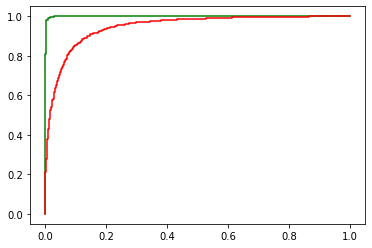

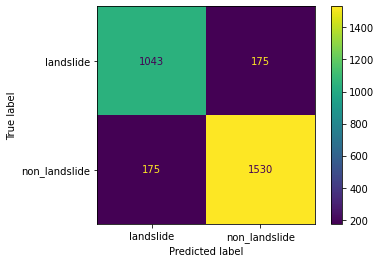

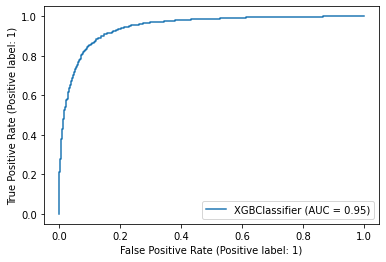

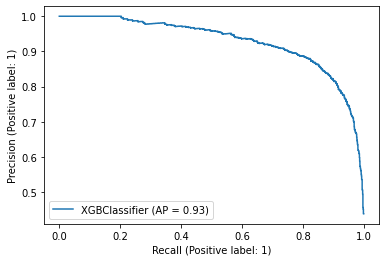

Feature Importance
	Place	Feature	%
	 1	& elevation\_13	& 16.57 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 11.72 \\ \hline
	 3	& soil\_rec\_c\_\_tex\_sub	& 8.01 \\ \hline
	 4	& soil\_rec\_tex\_sub	& 6.45 \\ \hline
	 5	& rock\_type	& 5.45 \\ \hline
	 6	& rock\_period	& 5.28 \\ \hline
	 7	& soil\_rec\_tex\_sup	& 5.02 \\ \hline
	 8	& soil\_tax	& 4.86 \\ \hline
	 9	& soil\_rec\_symbol	& 4.8 \\ \hline
	 10	& soil\_rec\_risk\_eros	& 4.67 \\ \hline
	 11	& soil\_rec\_c\_tex\_sup	& 4.18 \\ \hline
	 12	& soil\_use	& 3.96 \\ \hline
	 13	& soil\_rec\_mat\_origin	& 3.92 \\ \hline
	 14	& placurv\_13	& 3.85 \\ \hline
	 15	& slope\_13	& 3.35 \\ \hline
	 16	& soil\_rec\_sew\_class	& 2.7 \\ \hline
	 17	& aspect\_13	& 2.66 \\ \hline
	 18	& procurv\_13	& 2.56 \\ \hline


(0.8802600068422853,
 0.9468620737808724,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.90      0.90      0.90      1705\n    landslide       0.86      0.86      0.86      1218\n\n     accuracy                           0.88      2923\n    macro avg       0.88      0.88      0.88      2923\n weighted avg       0.88      0.88      0.88      2923\n',
 {'elevation_13': 16.57,
  'precipitation_mm_last_7_days': 11.72,
  'soil_rec_c__tex_sub': 8.01,
  'soil_rec_tex_sub': 6.45,
  'rock_type': 5.45,
  'rock_period': 5.28,
  'soil_rec_tex_sup': 5.02,
  'soil_tax': 4.86,
  'soil_rec_symbol': 4.8,
  'soil_rec_risk_eros': 4.67,
  'soil_rec_c_tex_sup': 4.18,
  'soil_use': 3.96,
  'soil_rec_mat_origin': 3.92,
  'placurv_13': 3.85,
  'slope_13': 3.35,
  'soil_rec_sew_class': 2.7,
  'aspect_13': 2.66,
  'procurv_13': 2.56})

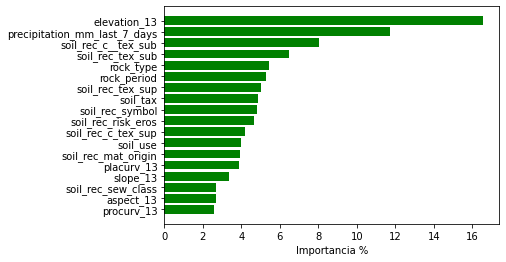

In [478]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_xgboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


#### Tune Parameters

In [499]:
import xgboost as xgb
clf_xgboost = xgb.XGBClassifier(random_state=0 )
model = "XGBoost"

In [482]:
from sklearn.model_selection import RandomizedSearchCV
params = {
 "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth": [ 3, 4, 5, 6, 8, 10, 12,15,18,20],
 "min_child_weight": [ 1, 3, 5, 7 ],
 "n_estimators":[50,100,200,300,400],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=RandomizedSearchCV(clf_xgboost,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [483]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [484]:
rs_model.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [500]:
clf_xgboost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=np.NaN, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

[02:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model SVC(C=0.1, degree=2, probability=True, random_state=0) 
Scores
Accuracy score Test: 0.8888128634964078
RocAuc score Test: 0.9533599140940631
Accuracy score Train: 0.9922275993547441
RocAuc score Train: 0.9997739858821513
Confusion Matrix
[[1058  160]
 [ 165 1540]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.91      0.90      0.90      1705
    landslide       0.87      0.87      0.87      1218

     accuracy                           0.89      2923
    macro avg       0.89      0.89      0.89      2923
 weighted avg       0.89      0.89      0.89      2923

 Roc Curve


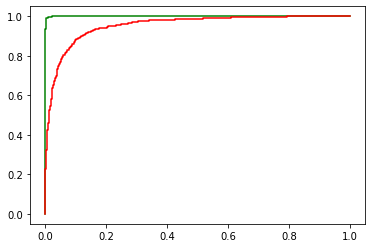

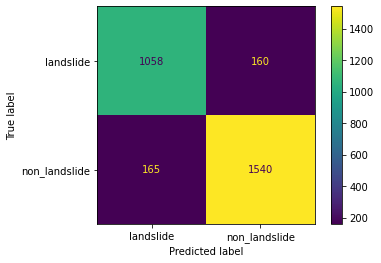

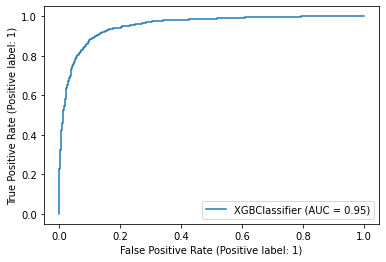

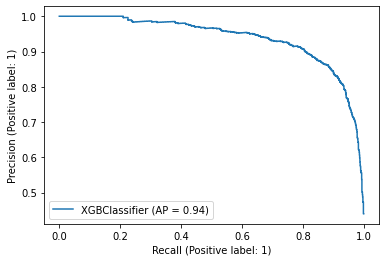

Feature Importance
	Place	Feature	%
	 1	& rock\_type	& 12.14 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 9.84 \\ \hline
	 3	& soil\_rec\_tex\_sub	& 9.73 \\ \hline
	 4	& elevation\_13	& 9.67 \\ \hline
	 5	& soil\_rec\_c\_\_tex\_sub	& 5.9 \\ \hline
	 6	& soil\_rec\_c\_tex\_sup	& 5.81 \\ \hline
	 7	& soil\_tax	& 5.79 \\ \hline
	 8	& soil\_rec\_risk\_eros	& 5.62 \\ \hline
	 9	& soil\_rec\_tex\_sup	& 5.38 \\ \hline
	 10	& rock\_period	& 4.59 \\ \hline
	 11	& soil\_rec\_mat\_origin	& 4.4 \\ \hline
	 12	& soil\_rec\_symbol	& 4.24 \\ \hline
	 13	& soil\_use	& 4.21 \\ \hline
	 14	& soil\_rec\_sew\_class	& 2.68 \\ \hline
	 15	& slope\_13	& 2.59 \\ \hline
	 16	& aspect\_13	& 2.58 \\ \hline
	 17	& placurv\_13	& 2.51 \\ \hline
	 18	& procurv\_13	& 2.32 \\ \hline


(0.8888128634964078,
 0.9533599140940631,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.91      0.90      0.90      1705\n    landslide       0.87      0.87      0.87      1218\n\n     accuracy                           0.89      2923\n    macro avg       0.89      0.89      0.89      2923\n weighted avg       0.89      0.89      0.89      2923\n',
 {'rock_type': 12.14,
  'precipitation_mm_last_7_days': 9.84,
  'soil_rec_tex_sub': 9.73,
  'elevation_13': 9.67,
  'soil_rec_c__tex_sub': 5.9,
  'soil_rec_c_tex_sup': 5.81,
  'soil_tax': 5.79,
  'soil_rec_risk_eros': 5.62,
  'soil_rec_tex_sup': 5.38,
  'rock_period': 4.59,
  'soil_rec_mat_origin': 4.4,
  'soil_rec_symbol': 4.24,
  'soil_use': 4.21,
  'soil_rec_sew_class': 2.68,
  'slope_13': 2.59,
  'aspect_13': 2.58,
  'placurv_13': 2.51,
  'procurv_13': 2.32})

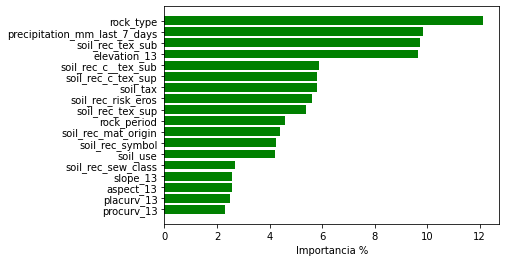

In [555]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf_xgboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,using_oversample=False)

### Train With Logistic Regression

In [511]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
clf_logistic_regression = LogisticRegression(random_state=0,)
model = "logistic_regression"


Model logistic_regression 
Scores
Accuracy score Test: 0.810126582278481
RocAuc score Test: 0.8970173689862234
Accuracy score Train: 0.7989441267047954
RocAuc score Train: 0.8843427202387966
Confusion Matrix
[[ 904  314]
 [ 241 1464]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.82      0.86      0.84      1705
    landslide       0.79      0.74      0.77      1218

     accuracy                           0.81      2923
    macro avg       0.81      0.80      0.80      2923
 weighted avg       0.81      0.81      0.81      2923

 Roc Curve


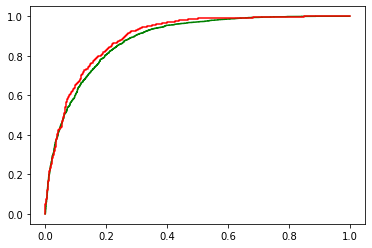

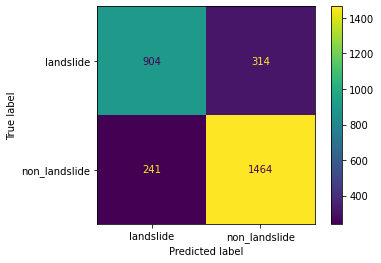

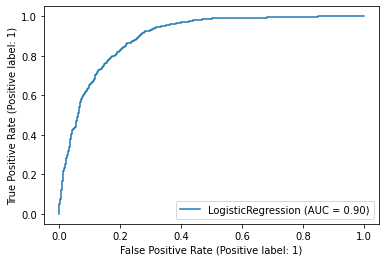

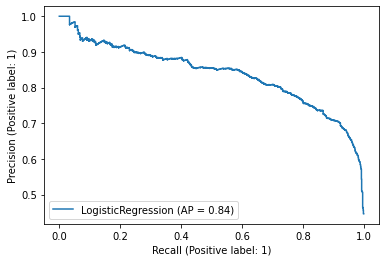

Feature Importance


UnboundLocalError: local variable 'feature_importances_dict_sorted' referenced before assignment

In [512]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_logistic_regression,model=model,X_train=X_train_sc, y_train=y_train, X_test=X_test_sc, y_test=y_test)


Feature Importance
	Place	Feature	%
	 1	& precipitation\_mm\_last\_7\_days	& 102.24 \\ \hline
	 2	& elevation\_13	& 89.73 \\ \hline
	 3	& soil\_rec\_tex\_sub	& 42.58 \\ \hline
	 4	& soil\_use	& 36.5 \\ \hline
	 5	& soil\_rec\_c\_\_tex\_sub	& 30.37 \\ \hline
	 6	& soil\_rec\_tex\_sup	& 18.86 \\ \hline
	 7	& aspect\_13	& 11.47 \\ \hline
	 8	& soil\_rec\_c\_tex\_sup	& 8.67 \\ \hline
	 9	& procurv\_13	& 1.73 \\ \hline
	 10	& soil\_rec\_risk\_eros	& -1.96 \\ \hline
	 11	& placurv\_13	& -3.38 \\ \hline
	 12	& soil\_rec\_sew\_class	& -7.25 \\ \hline
	 13	& soil\_rec\_mat\_origin	& -14.65 \\ \hline
	 14	& slope\_13	& -19.56 \\ \hline
	 15	& soil\_rec\_symbol	& -21.06 \\ \hline
	 16	& soil\_tax	& -21.81 \\ \hline
	 17	& rock\_period	& -24.22 \\ \hline
	 18	& rock\_type	& -38.67 \\ \hline


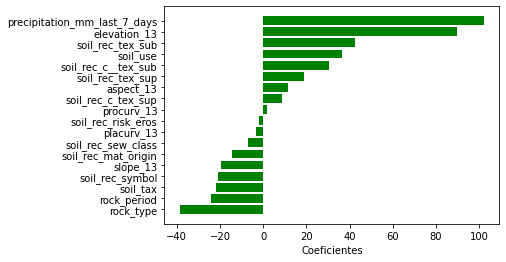

In [525]:
try:
    print("Feature Importance")
    importances = clf_logistic_regression.coef_[0]
    feature_importances_dict = dict()
    for x in range(len(importances)):
        feature_importances_dict[features[x]] = round(importances[x]*100,2)
    feature_importances_dict_sorted = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1],reverse=True)}
    print("\tPlace\tFeature\t%")
    index = 1
    for key in feature_importances_dict_sorted.keys():
        # if(feature_importances_dict[key]>0.5):
        print("\t {}\t& {}\t& {} \\\\ \\hline".format(index,key.replace("_","\\_"),feature_importances_dict[key]))
        index +=1
    importances = [feature_importances_dict_sorted[x] for x in reversed(feature_importances_dict_sorted.keys())]
    featuress = reversed(feature_importances_dict_sorted.keys())
    plt.figure(1)
    plt.barh(range(len(feature_importances_dict)), importances, color='g', align='center')
    plt.yticks(range(len(feature_importances_dict)), featuress)
    plt.xlabel('Coeficientes')
except:
    pass


### Train With SVM

In [528]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
from sklearn.svm import SVC
clf_svc = SVC(random_state=0,probability=True)
model = "SVM"


In [ ]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_svc,model=model,X_train=X_train_sc, y_train=y_train, X_test=X_test_sc, y_test=y_test)


#### Tune Parameters

In [531]:
from sklearn.model_selection import RandomizedSearchCV
params = {
         'C':[0.1,1,10,100,1000],
         'kernel':['rbf','poly','sigmoid','linear'],
         'degree':[1,2,3,4,5,6]}
rs_model=RandomizedSearchCV(clf_svc,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [532]:
rs_model.fit(X_train_sc,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'kernel': ['rbf', 'poly', 'sigmoid',
                                                   'linear']},
                   scoring='roc_auc', verbose=3)

In [533]:
rs_model.best_estimator_


SVC(C=0.1, degree=2, probability=True, random_state=0)

In [534]:
clf_svc = SVC(C=0.1, degree=2, probability=True, random_state=0)

Model SVM 
Scores
Accuracy score Test: 0.8481012658227848
RocAuc score Test: 0.9245099172240439
Accuracy score Train: 0.8383927262061885
RocAuc score Train: 0.9174280807366703
Confusion Matrix
[[ 967  251]
 [ 193 1512]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.86      0.89      0.87      1705
    landslide       0.83      0.79      0.81      1218

     accuracy                           0.85      2923
    macro avg       0.85      0.84      0.84      2923
 weighted avg       0.85      0.85      0.85      2923

 Roc Curve


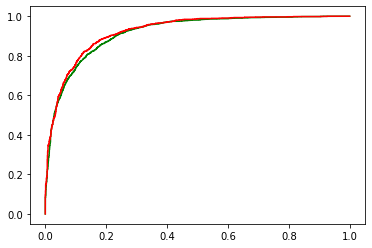

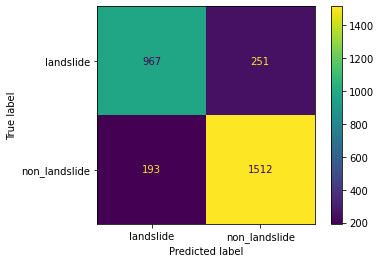

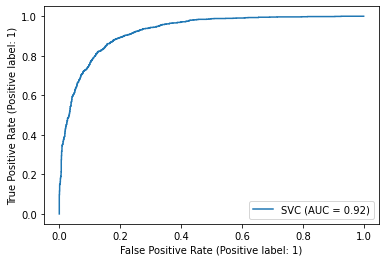

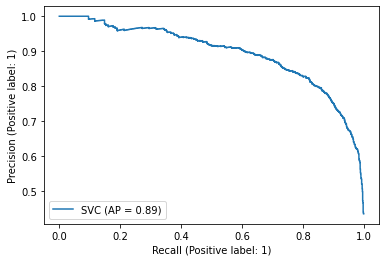

Feature Importance


UnboundLocalError: local variable 'feature_importances_dict_sorted' referenced before assignment

In [536]:
train_with_model_train_test_method(clf=clf_svc,model=model,X_train=X_train_sc, y_train=y_train, X_test=X_test_sc, y_test=y_test,using_oversample=False)

In [544]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf_svc, X_test_sc, y_test)


In [547]:
perm_importance.importances_mean

array([0.10940814, 0.00342114, 0.00499487, 0.00184742, 0.00116319,
       0.06315429, 0.00704755, 0.00417379, 0.01033185, 0.00444749,
       0.00725282, 0.0056791 , 0.01238454, 0.01354772, 0.00287376,
       0.00786863, 0.00608963, 0.00882655])

Feature Importance
	Place	Feature	%
	 1	& elevation\_13	& 10.94 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 6.32 \\ \hline
	 3	& soil\_rec\_c\_\_tex\_sub	& 1.35 \\ \hline
	 4	& soil\_rec\_tex\_sub	& 1.24 \\ \hline
	 5	& soil\_rec\_mat\_origin	& 1.03 \\ \hline
	 6	& rock\_period	& 0.88 \\ \hline
	 7	& soil\_use	& 0.79 \\ \hline
	 8	& soil\_rec\_tex\_sup	& 0.73 \\ \hline
	 9	& soil\_tax	& 0.7 \\ \hline
	 10	& rock\_type	& 0.61 \\ \hline
	 11	& soil\_rec\_c\_tex\_sup	& 0.57 \\ \hline
	 12	& aspect\_13	& 0.5 \\ \hline
	 13	& soil\_rec\_sew\_class	& 0.44 \\ \hline
	 14	& soil\_rec\_symbol	& 0.42 \\ \hline
	 15	& slope\_13	& 0.34 \\ \hline
	 16	& soil\_rec\_risk\_eros	& 0.29 \\ \hline
	 17	& placurv\_13	& 0.18 \\ \hline
	 18	& procurv\_13	& 0.12 \\ \hline


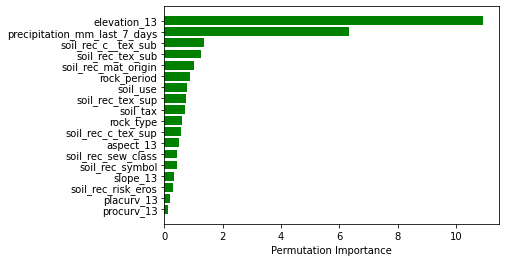

In [549]:
try:
    print("Feature Importance")
    importances = perm_importance.importances_mean
    feature_importances_dict = dict()
    for x in range(len(importances)):
        feature_importances_dict[features[x]] = round(importances[x]*100,2)
    feature_importances_dict_sorted = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1],reverse=True)}
    print("\tPlace\tFeature\t%")
    index = 1
    for key in feature_importances_dict_sorted.keys():
        # if(feature_importances_dict[key]>0.5):
        print("\t {}\t& {}\t& {} \\\\ \\hline".format(index,key.replace("_","\\_"),feature_importances_dict[key]))
        index +=1
    importances = [feature_importances_dict_sorted[x] for x in reversed(feature_importances_dict_sorted.keys())]
    featuress = reversed(feature_importances_dict_sorted.keys())
    plt.figure(1)
    plt.barh(range(len(feature_importances_dict)), importances, color='g', align='center')
    plt.yticks(range(len(feature_importances_dict)), featuress)
    plt.xlabel('Permutation Importance')
except:
    pass

### Print Plot with All Roc Auc Scores

<Figure size 432x288 with 0 Axes>

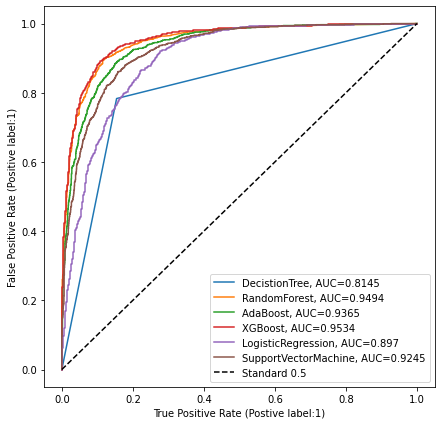

In [971]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(7,7)) 
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    model = models_1[i]
    model_name = model_names_1[i]
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AUC="+str(auc))

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",

]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    model = models_2[i]
    model_name = model_names_2[i]
    y_pred = model.predict_proba(X_test_sc)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AUC="+str(auc))
plt.plot([0, 1], [0, 1], color="black", linestyle="--",label="Standard 0.5")
plt.xlabel('True Positive Rate (Postive label:1)')
plt.ylabel('False Positive Rate (Positive label:1)') 
#print legend
plt.legend()

<Figure size 432x288 with 0 Axes>

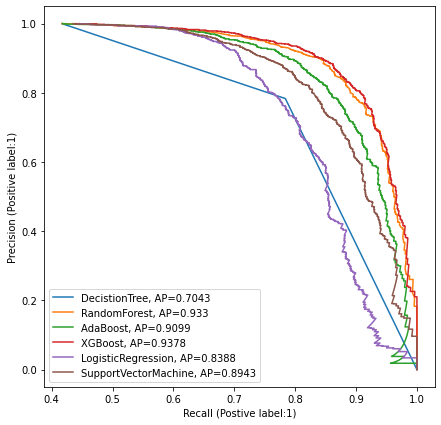

In [972]:
from sklearn.metrics import average_precision_score ,precision_recall_curve
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(7,7)) 
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    model = models_1[i]
    model_name = model_names_1[i]
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = precision_recall_curve(y_test, y_pred)
    auc = round(average_precision_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AP="+str(auc))

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",

]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    model = models_2[i]
    model_name = model_names_2[i]
    y_pred = model.predict_proba(X_test_sc)[:, 1]
    fpr, tpr, _ = precision_recall_curve(y_test, y_pred)
    auc = round(average_precision_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AP="+str(auc))

plt.xlabel('Recall (Postive label:1)')
plt.ylabel('Precision (Positive label:1)') 
#print legend
plt.legend()

## Save Models and Create Output for Guatemala Points

In [787]:

PATH_INPUT_GUATEMALA_POINTS = './data_merged_all_gt_map_final.csv'
PATH_OUTPUT_GUATEMALA_GEOJSON = 'data_gt_map_geojson_final_26_10.geojson'

In [788]:
# We read Excel with Guatemala Point to do susceptibility
guatemala_points = pd.read_csv(PATH_INPUT_GUATEMALA_POINTS,index_col=0)



In [789]:
len(guatemala_points)

96979

In [790]:
training2 = pd.read_csv(PATH_INPUT_CSV,index_col=0)

In [791]:
# Preprocessing Label Encoder
df = training2
# We use a label encoder for each of the columns of categories
features_string = [ 
 'soil_tax',
#  'satellite',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
 'fis_nomr',
 'soil_use',
 'rock_geo',
 'rock_type',
 'rock_period']
for feature in features_string:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    guatemala_points[feature] = le.transform(guatemala_points[feature])
    # training2[feature] = le.transform(training2[feature])

In [792]:
X_guatemala = guatemala_points[features]
X_guatemala_sc = sc.transform(X_guatemala)


In [650]:
def predict_with_model(clf,X):
    prediction = clf.predict(X)
    prediction_prob = clf.predict_proba(X)
    return prediction, prediction_prob

In [794]:
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    pred, pred_prob = predict_with_model(models_1[i],X_guatemala)
    guatemala_points['{}_prediction_prob'.format(model_names_1[i])] = pred_prob[:,1]

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",
]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    pred, pred_prob = predict_with_model(models_2[i],X_guatemala_sc)
    guatemala_points['{}_prediction_prob'.format(model_names_2[i])] = pred_prob[:,1]


In [795]:
names = model_names_1 + model_names_2
low = [0.0,0.33]
medium = [0.33,0.66]
high = [0.66,1]
def between(x,low,high):
    if (x>=low and x<=high):
        return True
    return False
def class_function(row,x):
    if between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    feat = name + '_prediction_prob' 
    guatemala_points[algoritm] = guatemala_points.apply(lambda x: class_function(x,feat), axis=1)

In [796]:
names = model_names_1 + model_names_2
verylow = [0.0,0.2]
low = [0.2,0.4]
medium = [0.4,0.6]
high = [0.6,0.8]
veryhigh = [0.8,1]
def between(x,l,h):
    if (x>=l and x<=h):
        return True
    return False
def class_function(row,x):
    if between(row[x],verylow[0],verylow[1]):
         return 'Very Low'
    elif between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
    elif between(row[x],veryhigh[0],veryhigh[1]):
        return 'Very High'
for name in names:
    algoritm = name + "_" + "class5"
    feat = name + '_prediction_prob' 
    guatemala_points[algoritm] = guatemala_points.apply(lambda x: class_function(x,feat), axis=1)

In [798]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    print(f"Counter prediction {name}")
    print(f"{guatemala_points.groupby([algoritm]).count()}")

Counter prediction DecistionTree
                      landslide_id  longitude  latitude  rock_geo  \
DecistionTree_class3                                                
High                         24002      24002     24002     24002   
Low                          51211      51211     51211     51211   
Medium                       21766      21766     21766     21766   

                      rock_period  fis_nomr  rock_type  soil_rec_symbol  \
DecistionTree_class3                                                      
High                        24002     24002      24002            24002   
Low                         51211     51211      51211            51211   
Medium                      21766     21766      21766            21766   

                      soil_rec_mat_origin  soil_rec_sew_class  ...  \
DecistionTree_class3                                           ...   
High                                24002               24002  ...   
Low                                

In [856]:
def get_table_density_index(name,classes=['Very Low','Low','Medium','High','Very High']):
    print(name)
    table = ""
    table = table + ("\tClase & \t \\% Pixeles & \\% Landslides Train & \\% Landslides Test & LD Train & LD Test\\\\ \\hline \n")
    number_of_classes=len(classes)
    for class_pred in classes:
        algoritm = name.split("_")[0] + "_" + "class" + str(number_of_classes)

        try:
            pixels = 100*guatemala_points[algoritm].value_counts()[class_pred]/len(guatemala_points) 
        except:
            pixels = 0
            ld_train = 0
            ld_test =0
        try:
            train = 100*X_val.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred] /X_val['landslide'].value_counts()[1]
        except:
            train = 0
        try:
            test = 100*X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred]/X_test_final['landslide'].value_counts()[1]
        except:
            test = 0
        if(pixels!=0):
            ld_train = train/pixels
            ld_test = test/pixels
        table = table +  ("\t{} & \t {} & {} & {}  & {} & {} \\\\ \\hline \n").format(class_pred,round(pixels,2),round(train,2),round(test,2),round(ld_train,2),round(ld_test,2))
    print(table)

In [864]:
get_table_density_index(names[5])

SupportVectorMachine
	Clase & 	 \% Pixeles & \% Landslides Train & \% Landslides Test & LD Train & LD Test\\ \hline 
	Very Low & 	 55.01 & 6.69 & 6.16  & 0.12 & 0.11 \\ \hline 
	Low & 	 15.96 & 9.95 & 8.87  & 0.62 & 0.56 \\ \hline 
	Medium & 	 10.6 & 11.17 & 11.74  & 1.05 & 1.11 \\ \hline 
	High & 	 9.23 & 17.65 & 18.47  & 1.91 & 2.0 \\ \hline 
	Very High & 	 9.2 & 54.53 & 54.76  & 5.93 & 5.95 \\ \hline 



In [806]:
def get_table_r_index(name,classes=['Very Low','Low','Medium','High','Very High']):
    print(name)
    table = ""
    table = table + ("\tClase & \t ni & Ni & ni/NI & LD R-index\\\\ \\hline \n")
    number_of_classes=len(classes) 
    for class_pred in classes:
        algoritm = name.split("_")[0] + "_" + "class" + str(number_of_classes)

        try:
            ni = X_val.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred]
        except:
            ni = 0 
        try:
            NI = guatemala_points[algoritm].value_counts()[class_pred]
        except:
            NI =0
        try:
            numerator_train =  ni/NI
        except:
            numerator_train = 0
        # try:
        #     numerator_test = X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred]/guatemala_points[algoritm].value_counts()[class_pred]
        # except:
        #     numerator_test = 0
        sum_train = 0
        # sum_test = 0
        for x in classes:
            try:
                numerator_train_x = X_val.groupby(['landslide',algoritm])['landslide'].size()[1][x] /guatemala_points[algoritm].value_counts()[x]
                sum_train = sum_train + numerator_train_x  
            except:
                sum_train = sum_train + 0
                pass
        try:
            
            rindextrain = numerator_train/(sum_train*100)
        except:
            rindextrain =0

        # for x in classes:
        #     try:
        #         numerator_test_x = 100*X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1][x]/guatemala_points[algoritm].value_counts()[x]
        #         sum_test = sum_test + numerator_test_x  
        #     except:
        #         sum_test = sum_test + 0
        #         pass
        # try:
        #     rindextest = numerator_test/(sum_test*100)
        # except:
        #     rindextest =0
        table = table +  ("\t{} & \t {} & {} & {} & {}   \\\\ \\hline \n").format(class_pred,round(ni,0), round(NI,0), round(numerator_train,6), round(rindextrain,8))
    print(table)

In [812]:
get_table_r_index(names[5])

SupportVectorMachine
	Clase & 	 ni & Ni & ni/NI & LD R-index\\ \hline 
	Very Low & 	 264 & 53351 & 0.004948 & 0.00012609   \\ \hline 
	Low & 	 393 & 15481 & 0.025386 & 0.00064688   \\ \hline 
	Medium & 	 441 & 10277 & 0.042911 & 0.00109346   \\ \hline 
	High & 	 697 & 8947 & 0.077903 & 0.00198512   \\ \hline 
	Very High & 	 2153 & 8923 & 0.241287 & 0.00614844   \\ \hline 



In [876]:
.groupby(['landslide']).count()

,elevation_13,slope_13,aspect_13,placurv_13,procurv_13,precipitation_mm_last_7_days,soil_tax,soil_rec_symbol,soil_rec_mat_origin,soil_rec_sew_class,...,AdaBoost_class3,XGBoost_class3,LogisticRegression_class3,SupportVectorMachine_class3,DecistionTree_class5,RandomForest_class5,AdaBoost_class5,XGBoost_class5,LogisticRegression_class5,SupportVectorMachine_class5
landslide,,,,,,,,,,,,,,,,,,,,,
0,4059,4059,4059,4059,4059,4059,4059,4059,4059,4059,...,4059,4059,4059,4059,4059,4059,4059,4059,4059,4059
1,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,...,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760


In [879]:
len(y_train)

6819

In [837]:
def train_with_model_train_test_method_no_print(clf, X_test,y_test):
    prediction = clf.predict(X_test)
    prediction_prob = clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, prediction)
    roc_auc_score_model = roc_auc_score(y_test,prediction_prob[:,1], labels=[1,0])
    res = precision_recall_fscore_support(y_test,  prediction,pos_label=1)
    precision = res[0]
    recall = res[1]
    f1score = f1_score(y_test,  prediction,pos_label=1)
    return accuracy,roc_auc_score_model, precision, recall,f1score

In [973]:
table = ""
table = table + ("\tAlgoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\\\ \\hline \n")
print(table)
models = models_1 + models_2
for index in range(len(names)):
    name = names[index]
    clf = models[index]
    algoritm = name.split("_")[0] + "_" + "class5"
    TNLS = X_test_final['landslide'].value_counts()[1]
    try:
        NLS = X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1]['Very High']
    except:
        NLS = 0
    rel_error = (TNLS-NLS)/TNLS
    
    if(name in model_names_2):
        accuracy,roc_auc_score_model, precision, recall,f1score = train_with_model_train_test_method_no_print(clf, X_test_sc,y_test)
    else: 
        accuracy,roc_auc_score_model, precision, recall,f1score = train_with_model_train_test_method_no_print(clf, X_test,y_test)
    table = table + (f"{name} & {round(rel_error,3)} & {round(roc_auc_score_model,2) }& {round(accuracy,2) } & {round(recall[0],2) } & {round(recall[1],2) } & {round(f1score,2)}  \\\\ \\hline \n")
print(table)
   

	Algoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\ \hline 

	Algoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\ \hline 
DecistionTree & 0.383 & 0.81& 0.82 & 0.85 & 0.78 & 0.78  \\ \hline 
RandomForest & 0.388 & 0.95& 0.89 & 0.9 & 0.86 & 0.86  \\ \hline 
AdaBoost & 1.0 & 0.94& 0.86 & 0.88 & 0.85 & 0.84  \\ \hline 
XGBoost & 0.305 & 0.95& 0.89 & 0.9 & 0.87 & 0.87  \\ \hline 
LogisticRegression & 0.611 & 0.9& 0.81 & 0.86 & 0.74 & 0.77  \\ \hline 
SupportVectorMachine & 0.452 & 0.92& 0.85 & 0.89 & 0.79 & 0.81  \\ \hline 



In [682]:
X_train = X_train.drop(columns=['DecistionTree_prediction_prob'])

In [763]:
X_test_final = X_test.copy(True)
X_train_final = X_train.copy(True)

In [764]:
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    pred, pred_prob = predict_with_model(models_1[i],X_train)
    X_train_final['{}_prediction_prob'.format(model_names_1[i])] = pred_prob[:,1]

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",
]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    pred, pred_prob = predict_with_model(models_2[i],X_train_sc)
    X_train_final['{}_prediction_prob'.format(model_names_2[i])] = pred_prob[:,1]


In [765]:
names = model_names_1 + model_names_2
low = [0.0,0.33]
medium = [0.33,0.66]
high = [0.66,1]
def between(x,low,high):
    if (x>=low and x<=high):
        return True
    return False
def class_function(row,x):
    if between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    feat = name + '_prediction_prob' 
    X_train_final[algoritm] = X_train_final.apply(lambda x: class_function(x,feat), axis=1)

In [766]:
names = model_names_1 + model_names_2
verylow = [0.0,0.2]
low = [0.2,0.4]
medium = [0.4,0.6]
high = [0.6,0.8]
veryhigh = [0.8,1]
def between(x,l,h):
    if (x>=l and x<=h):
        return True
    return False
def class_function(row,x):
    if between(row[x],verylow[0],verylow[1]):
         return 'Very Low'
    elif between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
    elif between(row[x],veryhigh[0],veryhigh[1]):
        return 'Very High'
for name in names:
    algoritm = name + "_" + "class5"
    feat = name + '_prediction_prob' 
    X_train_final[algoritm] = X_train_final.apply(lambda x: class_function(x,feat), axis=1)

In [767]:
X_train_final['landslide'] = y_train

In [695]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    print(f"Counter prediction {name}")
    print(f"{X_train_final.groupby(['landslide',algoritm]).count()}")

Counter prediction DecistionTree
                                elevation_13  slope_13  aspect_13  placurv_13  \
landslide DecistionTree_class3                                                  
0         High                           263       263        263         263   
          Low                           3201      3201       3201        3201   
          Medium                         595       595        595         595   
1         High                          1639      1639       1639        1639   
          Low                            365       365        365         365   
          Medium                         756       756        756         756   

                                procurv_13  precipitation_mm_last_7_days  \
landslide DecistionTree_class3                                             
0         High                         263                           263   
          Low                         3201                          3201   
          Medi

In [706]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    print(f"Counter prediction {name}")
    print(f"{X_train_final.groupby(['landslide',algoritm]).count()}")

Counter prediction DecistionTree
                                elevation_13  slope_13  aspect_13  placurv_13  \
landslide DecistionTree_class3                                                  
0         High                           263       263        263         263   
          Low                           3201      3201       3201        3201   
          Medium                         595       595        595         595   
1         High                          1639      1639       1639        1639   
          Low                            365       365        365         365   
          Medium                         756       756        756         756   

                                procurv_13  precipitation_mm_last_7_days  \
landslide DecistionTree_class3                                             
0         High                         263                           263   
          Low                         3201                          3201   
          Medi

In [ ]:
# X_test_final

In [768]:
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    pred, pred_prob = predict_with_model(models_1[i],X_test)
    X_test_final['{}_prediction_prob'.format(model_names_1[i])] = pred_prob[:,1]

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",
]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    pred, pred_prob = predict_with_model(models_2[i],X_test_sc)
    X_test_final['{}_prediction_prob'.format(model_names_2[i])] = pred_prob[:,1]


In [769]:
names = model_names_1 + model_names_2
low = [0.0,0.33]
medium = [0.33,0.66]
high = [0.66,1]
def between(x,low,high):
    if (x>=low and x<=high):
        return True
    return False
def class_function(row,x):
    if between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    feat = name + '_prediction_prob' 
    X_test_final[algoritm] = X_test_final.apply(lambda x: class_function(x,feat), axis=1)

In [770]:
names = model_names_1 + model_names_2
verylow = [0.0,0.2]
low = [0.2,0.4]
medium = [0.4,0.6]
high = [0.6,0.8]
veryhigh = [0.8,1]
def between(x,l,h):
    if (x>=l and x<=h):
        return True
    return False
def class_function(row,x):
    if between(row[x],verylow[0],verylow[1]):
         return 'Very Low'
    elif between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
    elif between(row[x],veryhigh[0],veryhigh[1]):
        return 'Very High'
for name in names:
    algoritm = name + "_" + "class5"
    feat = name + '_prediction_prob' 
    X_test_final[algoritm] = X_test_final.apply(lambda x: class_function(x,feat), axis=1)

In [771]:
X_test_final['landslide'] = y_test

In [772]:
training2 = pd.read_csv(PATH_INPUT_CSV,index_col=0)
X_val = X_train_final.merge(X_test_final,  how='outer')
X_val = X_val.join(training2[['latitude','longitude']])

In [773]:
name = names[3]
print(name)
table = ""
table = table + ("\tClase & \t \\% Pixeles & \\% Landslides Train & \\% Landslides Test  & LD Train & LD Test \\\\ \\hline \n")

for class_pred in ['Very Low','Low','Medium','High','Very High']:
    algoritm = name.split("_")[0] + "_" + "class5"

    try:
        pixels = 100*guatemala_points[algoritm].value_counts()[class_pred]/len(guatemala_points) 
    except:
        pixels = 0
        ld_train = 0
        ld_test =0
    try:
        train = 100*X_val.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred] /X_val[algoritm].value_counts()[class_pred]
    except:
        train = 0
    try:
        test = 100*X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred]/X_test_final[algoritm].value_counts()[class_pred]
    except:
        test = 0
    if(pixels!=0):
        ld_train = train/pixels
        ld_test = test/pixels
    table = table +  ("\t{} & \t {} & {} & {}  & {} & {} \\\\ \\hline \n").format(class_pred,round(pixels,2),round(train,2),round(test,2),round(ld_train,2),round(ld_test,2))
print(table)

XGBoost
	Clase & 	 \% Pixeles & \% Landslides Train & \% Landslides Test  & LD Train & LD Test \\ \hline 
	Very Low & 	 0 & 1.36 & 4.89  & 0 & 0 \\ \hline 
	Low & 	 0 & 14.46 & 30.29  & 0 & 0 \\ \hline 
	Medium & 	 0 & 52.44 & 52.5  & 0 & 0 \\ \hline 
	High & 	 0 & 84.08 & 71.49  & 0 & 0 \\ \hline 
	Very High & 	 0 & 98.21 & 93.38  & 0 & 0 \\ \hline 



In [701]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    print(f"Counter prediction {name}")
    print(f"{X_test_final.groupby(['landslide',algoritm]).count()}")

Counter prediction DecistionTree
                                elevation_13  slope_13  aspect_13  placurv_13  \
landslide DecistionTree_class3                                                  
0         High                           109       109        109         109   
          Low                           1354      1354       1354        1354   
          Medium                         242       242        242         242   
1         High                           752       752        752         752   
          Low                            148       148        148         148   
          Medium                         318       318        318         318   

                                procurv_13  precipitation_mm_last_7_days  \
landslide DecistionTree_class3                                             
0         High                         109                           109   
          Low                         1354                          1354   
          Medi

In [704]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class5"
    print(f"Counter prediction {name}")
    print(f"{X_test_final.groupby(['landslide',algoritm]).count()}")

Counter prediction DecistionTree
                                elevation_13  slope_13  aspect_13  placurv_13  \
landslide DecistionTree_class5                                                  
0         High                            70        70         70          70   
          Low                            295       295        295         295   
          Medium                         172       172        172         172   
          Very High                      109       109        109         109   
          Very Low                      1059      1059       1059        1059   
1         High                           135       135        135         135   
          Low                             67        67         67          67   
          Medium                         183       183        183         183   
          Very High                      752       752        752         752   
          Very Low                        81        81         81          8

In [709]:
guatemala_points.to_csv('./results/gt_points.csv')
X_train_final.to_csv('./results/X_train.csv')
X_test_final.to_csv('./results/X_test.csv')

In [903]:
X_train_final['train'] = 1
X_test_final['train'] = 0

In [922]:
X_val['latitude']

0       15.404321
1       15.400536
2       15.505815
3       15.481815
4       15.374529
          ...    
9737    14.560675
9738    14.695833
9739    15.373900
9740    14.643056
9741    14.524722
Name: latitude, Length: 9742, dtype: float64

In [923]:
training['latitude']

0       15.404321
1       15.400536
2       15.505815
3       15.481815
4       15.374529
          ...    
9737    14.560675
9738    14.695833
9739    15.373900
9740    14.643056
9741    14.524722
Name: latitude, Length: 9742, dtype: float64

In [928]:
X_val['landslide']

0       1
1       0
2       0
3       0
4       1
       ..
9737    0
9738    1
9739    0
9740    1
9741    0
Name: landslide, Length: 9742, dtype: int64

In [937]:
X_train_final['landslide'].iloc[0:2]

8767    1
3381    0
Name: landslide, dtype: int64

In [951]:
X_val['landslide']

8767    1
3381    0
2994    0
4576    0
5879    1
       ..
1329    0
9327    1
474     0
6396    1
5006    0
Name: landslide, Length: 9742, dtype: int64

In [956]:
training2 = pd.read_csv(PATH_INPUT_CSV,index_col=0)
X_val = pd.concat([X_train_final ,X_test_final],ignore_index=False)
X_val = pd.merge(
    X_val,
    training2[['latitude','longitude']],
    how="inner",
    left_index=True,
    right_index=True)
X_val.to_csv('./mean_result/X_val_all.csv')




In [747]:
X_val[
    'landslide'
]

0       1
1       0
2       0
3       0
4       1
       ..
9737    0
9738    1
9739    0
9740    1
9741    0
Name: landslide, Length: 9742, dtype: int64

In [711]:
from geojson import Feature, Point, FeatureCollection,dumps

In [957]:
# We now create a geojson from the data we used to train
features = []
names = model_names_1 + model_names_2
for index,row in X_val.iterrows():
    try:
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        
        # Checking if points is inside our country "Guatemala" and data is correct
        row_properties = { }
        for name in names:
            alg = "{}_prediction_prob".format(name)
            alg2 = "{}_class5".format(name)
            alg3 = "{}_class5".format(name) 
            row_properties[alg] = row[alg]
            row_properties[alg2] = row[alg2]
            row_properties[alg3] = row[alg3]
            row_properties['landslide'] = row['landslide']
    
        row_point = Point(coordinates=(longitude,latitude))
        row_feature = Feature(geometry=row_point,properties=row_properties)
        features.append(row_feature)   
        print(index, "/",len(guatemala_points)) 
    except Exception as e: 
        print(e)
        
        "Any error while parsing a data point"
        pass

feature_collection_landslides = FeatureCollection(features=features)
dump_landslides = dumps(feature_collection_landslides)
f = open("./results/geojson_train_test.geojson", "w")
f.write(dump_landslides)
f.close()

8767 / 96979
3381 / 96979
2994 / 96979
4576 / 96979
5879 / 96979
3673 / 96979
3860 / 96979
4138 / 96979
552 / 96979
880 / 96979
7474 / 96979
2505 / 96979
3861 / 96979
4399 / 96979
7562 / 96979
7959 / 96979
8979 / 96979
4255 / 96979
9116 / 96979
9256 / 96979
4737 / 96979
1752 / 96979
4937 / 96979
4216 / 96979
6358 / 96979
7819 / 96979
8891 / 96979
1014 / 96979
7433 / 96979
5676 / 96979
9717 / 96979
7945 / 96979
5782 / 96979
3696 / 96979
6587 / 96979
5564 / 96979
7883 / 96979
8268 / 96979
5433 / 96979
8831 / 96979
4721 / 96979
1555 / 96979
2902 / 96979
8563 / 96979
2067 / 96979
768 / 96979
2644 / 96979
6607 / 96979
1292 / 96979
2011 / 96979
4725 / 96979
4775 / 96979
7357 / 96979
3652 / 96979
7135 / 96979
1953 / 96979
7552 / 96979
9209 / 96979
1343 / 96979
917 / 96979
9260 / 96979
4913 / 96979
1336 / 96979
9331 / 96979
4512 / 96979
4313 / 96979
2586 / 96979
4477 / 96979
8243 / 96979
85 / 96979
9420 / 96979
8770 / 96979
8673 / 96979
2038 / 96979
6825 / 96979
2095 / 96979
502 / 96979
7926 /

In [958]:
# We now create a geojson from the data we used to train
features = []
names = model_names_1 + model_names_2
for index,row in guatemala_points.iterrows():
    try:
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        
        # Checking if points is inside our country "Guatemala" and data is correct
        row_properties = { }
        for name in names:
            alg = "{}_prediction_prob".format(name)
            alg2 = "{}_class5".format(name)
            alg3 = "{}_class5".format(name) 
            row_properties[alg] = row[alg]
            row_properties[alg2] = row[alg2]
            row_properties[alg3] = row[alg3]
            
    
        row_point = Point(coordinates=(longitude,latitude))
        row_feature = Feature(geometry=row_point,properties=row_properties)
        features.append(row_feature)   
        print(index, "/",len(guatemala_points)) 
    except Exception as e: 
        print(e)
        
        "Any error while parsing a data point"
        pass

feature_collection_landslides = FeatureCollection(features=features)
dump_landslides = dumps(feature_collection_landslides)
f = open("./results/guatemala_points.geojson", "w")
f.write(dump_landslides)
f.close()

1 / 96979
4 / 96979
5 / 96979
6 / 96979
7 / 96979
8 / 96979
11 / 96979
12 / 96979
13 / 96979
14 / 96979
15 / 96979
16 / 96979
20 / 96979
21 / 96979
22 / 96979
23 / 96979
24 / 96979
25 / 96979
28 / 96979
29 / 96979
30 / 96979
31 / 96979
32 / 96979
33 / 96979
34 / 96979
35 / 96979
36 / 96979
37 / 96979
39 / 96979
40 / 96979
41 / 96979
42 / 96979
43 / 96979
44 / 96979
45 / 96979
46 / 96979
47 / 96979
48 / 96979
49 / 96979
50 / 96979
52 / 96979
53 / 96979
54 / 96979
55 / 96979
56 / 96979
57 / 96979
58 / 96979
59 / 96979
60 / 96979
61 / 96979
62 / 96979
63 / 96979
64 / 96979
65 / 96979
68 / 96979
69 / 96979
70 / 96979
71 / 96979
72 / 96979
73 / 96979
74 / 96979
75 / 96979
76 / 96979
77 / 96979
78 / 96979
79 / 96979
80 / 96979
81 / 96979
82 / 96979
83 / 96979
86 / 96979
87 / 96979
88 / 96979
89 / 96979
90 / 96979
91 / 96979
92 / 96979
93 / 96979
94 / 96979
95 / 96979
96 / 96979
97 / 96979
98 / 96979
99 / 96979
100 / 96979
101 / 96979
102 / 96979
103 / 96979
104 / 96979
107 / 96979
108 / 9697

In [974]:
def train_with_model_train_test_method_no_print_train_test(clf, X_test,y_test, X_train, y_train):
    prediction = clf.predict(X_test)
    prediction_prob = clf.predict_proba(X_test)
    prediction_train = clf.predict(X_train)
    prediction_prob_train = clf.predict_proba(X_train)
    accuracy = accuracy_score(y_test, prediction)
    roc_auc_score_model = roc_auc_score(y_test,prediction_prob[:,1], labels=[1,0])
    accuracy_train = accuracy_score(y_train, prediction_train)
    roc_auc_score_model_train = roc_auc_score(y_train,prediction_prob_train[:,1], labels=[1,0])
    return accuracy,roc_auc_score_model, accuracy_train,roc_auc_score_model_train

In [975]:
table = ""
table = table + ("\tAlgoritmo & ROC Train & ROC Test & ACC Train & ACC Test\\\\ \\hline \n")
print(table)
models = models_1 + models_2
for index in range(len(names)):
    name = names[index]
    clf = models[index]
    
    if(name in model_names_2):
        accuracy,roc_auc_score_model, accuracy_train, roc_auc_score_model_train = train_with_model_train_test_method_no_print_train_test(clf, X_test_sc,y_test,X_train_sc,y_train)
    else: 
        accuracy,roc_auc_score_model, accuracy_train, roc_auc_score_model_train = train_with_model_train_test_method_no_print_train_test(clf, X_test,y_test,X_train,y_train)
    table = table + (f"{name} &  {round(roc_auc_score_model,2) }& {round(accuracy,2) } &  {round(roc_auc_score_model_train,2) }& {round(accuracy_train,2) }   \\\\ \\hline \n")
print(table)

	Algoritmo & ROC Train & ROC Test & ACC Train & ACC Test\\ \hline 

	Algoritmo & ROC Train & ROC Test & ACC Train & ACC Test\\ \hline 
DecistionTree &  0.81& 0.82 &  1.0& 1.0   \\ \hline 
RandomForest &  0.95& 0.89 &  1.0& 1.0   \\ \hline 
AdaBoost &  0.94& 0.86 &  0.94& 0.87   \\ \hline 
XGBoost &  0.95& 0.89 &  1.0& 0.99   \\ \hline 
LogisticRegression &  0.9& 0.81 &  0.88& 0.8   \\ \hline 
SupportVectorMachine &  0.92& 0.85 &  0.92& 0.84   \\ \hline 

